In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('D:\Coventry\Modeling\comcast_fcc_complaints_2015.csv')
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Description
0,250635,Comcast Cable Internet Speeds,4/22/2015,3:53:50 PM,Internet,Abingdon,Maryland,21009,Closed,No,I have been contacting Comcast Internet Techni...
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Back in January 2015 I made 2 payments: One fo...
2,242732,Speed and Service,4/18/2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Our home is located at in Acworth Georgia 3010...
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Comcast in the Atlanta area has just put into ...
4,307175,Comcast not working and no service to boot,5/26/2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,I have been a customer of Comcast of some sort...


# EDA

In [3]:
df.shape

(2225, 11)

In [4]:
df.Description[2]

'Our home is located at in Acworth Georgia 30101. We signed a one year contract with Comcast / Xfinity for high speed internet service starting on July 2014. The account number is . The base rate is $39.99 billed monthly. I am sending this compliant on behalf of my partner/husband Mr. . who’s name is on the contact.\n The service agreement was for high speed internet only at the speed of 50Mbps. On average the internet speed is half of the promised agreement at our location. The service for the past month has become much slower in the ranges of 5 to 15Mbps. We placed a service call on 04/018/2015 and was given 4 appointment times after repeated calls. Each appointment was missed and no one showed up to investigate the problem. While on the phone with each CSR (customer service rep) they would review the inbound service line remotely to “clear” the line. This has been done several times prior to this date over the past year. Our service will go out and drop for several hours at a time, 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2225 non-null   object
 1   Customer Complaint           2225 non-null   object
 2   Date                         2225 non-null   object
 3   Time                         2225 non-null   object
 4   Received Via                 2225 non-null   object
 5   City                         2225 non-null   object
 6   State                        2225 non-null   object
 7   Zip code                     2225 non-null   int64 
 8   Status                       2225 non-null   object
 9   Filing on Behalf of Someone  2225 non-null   object
 10  Description                  2225 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.3+ KB


In [6]:
df['Customer Complaint'].value_counts()

Comcast                                                        83
Comcast Internet                                               18
Comcast Data Cap                                               17
comcast                                                        13
Data Caps                                                      11
                                                               ..
Price of Internet service                                       1
One Sided Contracts                                             1
Comcast cramming services I didn't ask for to raise my bill     1
Comcast Dishonest Marketing Scheme                              1
Comcast billing/service                                         1
Name: Customer Complaint, Length: 1842, dtype: int64

In [7]:
df['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    155
Name: Status, dtype: int64

In [8]:
df.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Time', 'Received Via',
       'City', 'State', 'Zip code', 'Status', 'Filing on Behalf of Someone',
       'Description'],
      dtype='object')

In [9]:
# Remove the columns
docs = df.drop(columns=['Ticket #', 'Customer Complaint', 'Date', 'Time', 'Received Via',
       'City', 'State', 'Zip code', 'Status', 'Filing on Behalf of Someone'], axis=1)

docs.head()

,Description
0,I have been contacting Comcast Internet Techni...
1,Back in January 2015 I made 2 payments: One fo...
2,Our home is located at in Acworth Georgia 3010...
3,Comcast in the Atlanta area has just put into ...
4,I have been a customer of Comcast of some sort...


In [10]:
# Document shape
docs.shape

(2225, 1)

In [34]:
# Converting dataframe to CSV file
docs.to_csv('D:\Coventry\Modeling\comcast_docs.csv',
                     sep=',', encoding='utf-8', index=False)

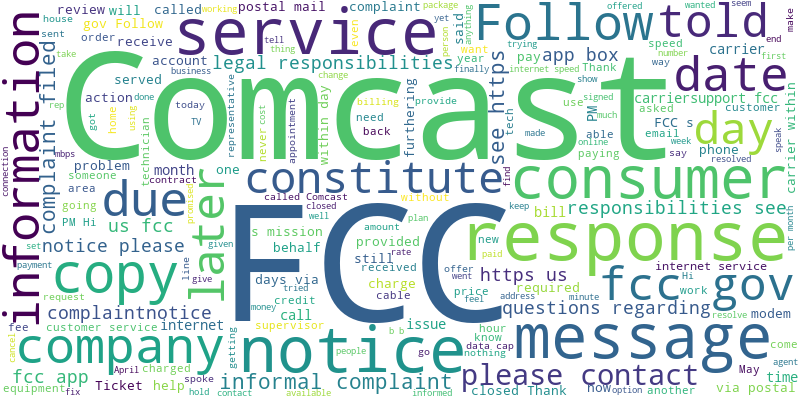

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(docs['Description'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue', width=800, height=400)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# Pre-processing

In [12]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import spacy

stop = stopwords.words('english')
stop.extend(['fcc', 'comcast', 'service', 'services', 'issue', 'issues', 'problem', 'problems', 'xfinity', 'customer', 'complaint', 'would'])
stop = set(stop)
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    verbatim = doc.split('Follow-up')[0]
    stop_free = " ".join([i for i in verbatim.lower().split() if i not in stop])
    punc_free = nlp(''.join(ch for ch in stop_free if ch not in exclude and not ch.isdigit()))
    pos_tags = [p.lemma_ for p in punc_free if p.pos_ in allowed_postags]
    return pos_tags

doc_clean = [clean(doc) for doc in docs.Description]

In [13]:
print(doc_clean[1])

['back', 'make', 'payment', 'januarys', 'february', 'advance', 'payment', 'march', 'go', 'web', 'page', 'make', 'payment', 'see', 'account', 'show', 'due', 'call', 'find', 'payment', 'go', 'deduct', 'bank', 'account', 'offer', 'send', 'copy', 'bank', 'statement', 'seem', 'care', 'give', 'confirmation', 'number', 'investigation', 'promise', 'call', 'call', 'turn', 'service', 'call', 'give', 'confirmation', 'number', 'investigation', 'promise', 'restore', 'investigation', 'complete', 'still', 'call', 'start', 'investigation', 'seem', 'care', 'commit', 'fraud', 'customer', 'money']


[('internet', 3400), ('call', 3342), ('get', 2141), ('tell', 2137), ('month', 1996), ('pay', 1835), ('time', 1831), ('bill', 1829), ('charge', 1601), ('say', 1445), ('speed', 1327), ('service', 1247), ('go', 1241), ('cable', 1179), ('phone', 1148), ('day', 1029), ('account', 1021), ('receive', 967), ('use', 927), ('modem', 902), ('work', 878), ('comcast', 857), ('new', 854), ('never', 817), ('want', 794), ('come', 781), ('year', 757), ('make', 753), ('fee', 740), ('ask', 707)]


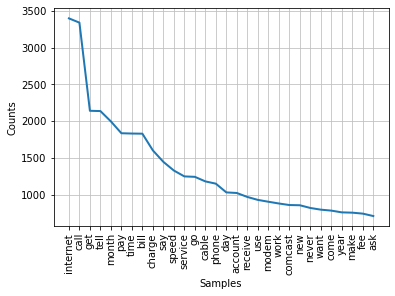

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
import nltk
from nltk import FreqDist

filtered_complaints = [c for cl in doc_clean for c in cl]
fdist = FreqDist(filtered_complaints)
print(fdist.most_common(30))
fdist.plot(30)

# BOW LDA Model

In [15]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

print('Distinct words in documents:', len(dictionary))

Distinct words in documents: 7088


In [16]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [21]:
doc_term_matrix[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 2),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 3),
 (21, 1),
 (22, 1),
 (23, 6),
 (24, 2),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 3),
 (29, 1),
 (30, 1),
 (31, 6),
 (32, 1),
 (33, 1),
 (34, 7),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 2),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 5),
 (47, 2),
 (48, 2),
 (49, 3),
 (50, 1),
 (51, 1)]

In [17]:
# Number of topics for base model
num_topics = 6

In [18]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.LdaMulticore

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=num_topics, id2word = dictionary, random_state = 100)

In [19]:
import pyLDAvis
from gensim.models import CoherenceModel, LdaModel
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.001653 -0.005256       1        1  26.138211
1     -0.012768  0.010752       2        1  23.003850
4     -0.004761 -0.010724       3        1  19.658861
2      0.019398 -0.009562       4        1  13.296354
3     -0.017205 -0.002526       5        1  12.329463
0      0.013683  0.017316       6        1   5.573261, topic_info=         Term         Freq        Total Category  logprob  loglift
23   internet  3236.000000  3236.000000  Default  30.0000  30.0000
56       call  3312.000000  3312.000000  Default  29.0000  29.0000
272      tell  2088.000000  2088.000000  Default  28.0000  28.0000
288     cable  1117.000000  1117.000000  Default  27.0000  27.0000
169      tech   517.000000   517.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
286      work    42.562024   887.858913   Topic6  -5.3566  -0.1507
6        bill    48.276682  1752.392438   Topic6  -5.2306  -0.7046
290   comcast    40.831159   808.722208   Topic6  -5.3981  -0.0988
101      come    38.675845   777.309446   Topic6  -5.4524  -0.1134
52    account    38.829448   987.792545   Topic6  -5.4484  -0.3491

[517 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
203       1  0.239647  able
203       2  0.166155  able
203       3  0.162960  able
203       4  0.198108  able
203       5  0.166155  able
...     ...       ...   ...
176       4  0.190577  year
176       5  0.080098  year
176       6  0.051097  year
5457      1  0.175536    ……
5457      2  0.702145    ……

[1122 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 5, 3, 4, 1])

In [20]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.998377097480608

Coherence Score:  0.32157797887987166


In [48]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(ldamodel.print_topics())

[(0,
  '0.020*"internet" + 0.016*"call" + 0.013*"tell" + 0.012*"get" + 0.011*"pay" '
  '+ 0.010*"cable" + 0.009*"month" + 0.008*"tech" + 0.008*"time" + '
  '0.008*"want"'),
 (1,
  '0.029*"call" + 0.018*"internet" + 0.017*"tell" + 0.016*"get" + 0.012*"time" '
  '+ 0.012*"say" + 0.011*"charge" + 0.010*"pay" + 0.010*"phone" + '
  '0.009*"month"'),
 (2,
  '0.027*"internet" + 0.012*"speed" + 0.012*"tell" + 0.012*"get" + 0.011*"go" '
  '+ 0.011*"call" + 0.010*"cable" + 0.009*"month" + 0.009*"pay" + '
  '0.008*"time"'),
 (3,
  '0.023*"call" + 0.016*"internet" + 0.016*"tell" + 0.016*"bill" + 0.012*"get" '
  '+ 0.012*"pay" + 0.011*"time" + 0.011*"month" + 0.009*"account" + '
  '0.008*"go"'),
 (4,
  '0.020*"month" + 0.019*"internet" + 0.018*"call" + 0.016*"bill" + '
  '0.013*"get" + 0.011*"time" + 0.010*"account" + 0.010*"tell" + 0.010*"pay" + '
  '0.009*"charge"'),
 (5,
  '0.021*"internet" + 0.019*"call" + 0.012*"pay" + 0.012*"charge" + '
  '0.012*"get" + 0.012*"time" + 0.011*"tell" + 0.011*"bi

In [49]:
print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
for i in range(6):
    print('\nTopic {}\n'.format(str(i)))
    for term, frequency in ldamodel.show_topic(i, topn=10):
        print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))

term                 frequency


Topic 0

internet             0.020
call                 0.016
tell                 0.013
get                  0.012
pay                  0.011
cable                0.010
month                0.009
tech                 0.008
time                 0.008
want                 0.008

Topic 1

call                 0.029
internet             0.018
tell                 0.017
get                  0.016
time                 0.012
say                  0.012
charge               0.011
pay                  0.010
phone                0.010
month                0.009

Topic 2

internet             0.027
speed                0.012
tell                 0.012
get                  0.012
go                   0.011
call                 0.011
cable                0.010
month                0.009
pay                  0.009
time                 0.008

Topic 3

call                 0.023
internet             0.016
tell                 0.016
bill                 0.016
get       

In [50]:
unseen_document = 'My Internet is not working'
d_c = clean(unseen_document)
print(d_c)
bow_vector = dictionary.doc2bow(d_c)
for index, score in sorted(ldamodel[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, ldamodel.print_topic(index, 5)))

['internet', 'working']
Score: 0.7196126580238342	 Topic: 0.027*"internet" + 0.012*"speed" + 0.012*"tell" + 0.012*"get" + 0.011*"go"
Score: 0.056152649223804474	 Topic: 0.029*"call" + 0.018*"internet" + 0.017*"tell" + 0.016*"get" + 0.012*"time"
Score: 0.05614925175905228	 Topic: 0.020*"internet" + 0.016*"call" + 0.013*"tell" + 0.012*"get" + 0.011*"pay"
Score: 0.05602969601750374	 Topic: 0.021*"internet" + 0.019*"call" + 0.012*"pay" + 0.012*"charge" + 0.012*"get"
Score: 0.056029390543699265	 Topic: 0.020*"month" + 0.019*"internet" + 0.018*"call" + 0.016*"bill" + 0.013*"get"
Score: 0.05602634698152542	 Topic: 0.023*"call" + 0.016*"internet" + 0.016*"tell" + 0.016*"bill" + 0.012*"get"


# TF-IDF LDA Model

In [51]:
from gensim import corpora, models
tfidf = models.TfidfModel(doc_term_matrix)
corpus_tfidf = tfidf[doc_term_matrix]

In [106]:
corpus_tfidf[0]

[(0, 0.13643518010848796),
 (1, 0.171242056053436),
 (2, 0.0833992814032825),
 (3, 0.081292714600938),
 (4, 0.05127722653368825),
 (5, 0.20027251398916032),
 (6, 0.0329674837709355),
 (7, 0.15090646649083417),
 (8, 0.11723123169258141),
 (9, 0.09122044651944898),
 (10, 0.12468486228339386),
 (11, 0.07478371866316158),
 (12, 0.24419390131423713),
 (13, 0.2222332076516987),
 (14, 0.09555987870621685),
 (15, 0.1129286879790146),
 (16, 0.057010568283602625),
 (17, 0.07648832740667966),
 (18, 0.025817204628899637),
 (19, 0.15443038200052966),
 (20, 0.19013370557720705),
 (21, 0.07879954020411749),
 (22, 0.17458014942434097),
 (23, 0.07231021974460906),
 (24, 0.11959727181859443),
 (25, 0.07949208327175444),
 (26, 0.04704660699139947),
 (27, 0.15443038200052966),
 (28, 0.08109072035306378),
 (29, 0.07042136261572426),
 (30, 0.04497829529888442),
 (31, 0.15645345453428872),
 (32, 0.1932027497159744),
 (33, 0.09644410122564873),
 (34, 0.30675307771722954),
 (35, 0.12430099596576737),
 (36, 0.1

In [52]:
# Running and Trainign LDA model on the document term matrix.
ldamodel_tfidf = Lda(corpus_tfidf, num_topics=num_topics, id2word = dictionary, random_state = 100)

In [53]:
import pyLDAvis
from gensim.models import CoherenceModel, LdaModel
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(ldamodel_tfidf, doc_term_matrix, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.020492 -0.003029       1        1  62.516691
1      0.008442 -0.020742       2        1   9.569001
4      0.002187  0.004593       3        1   8.849092
3      0.003181 -0.008181       4        1   7.685236
2     -0.012317  0.012479       5        1   6.751957
0      0.019000  0.014880       6        1   4.628023, topic_info=        Term        Freq       Total Category  logprob  loglift
46     speed  589.000000  589.000000  Default  30.0000  30.0000
56      call  574.000000  574.000000  Default  29.0000  29.0000
6       bill  561.000000  561.000000  Default  28.0000  28.0000
28     month  473.000000  473.000000  Default  27.0000  27.0000
179   charge  509.000000  509.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
42       say   14.417884  414.810750   Topic6  -6.2533  -0.2863
49      time   14.675456  438.218294   Topic6  -6.2355  -0.3235
52   account   13.292568  348.392402   Topic6  -6.3345  -0.1931
191      new   12.673794  290.255490   Topic6  -6.3822  -0.0582
145    phone   12.796425  358.508042   Topic6  -6.3726  -0.2597

[499 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
52        1  0.602769  account
52        2  0.086110  account
52        3  0.109072  account
52        4  0.103332  account
52        5  0.060277  account
...     ...       ...      ...
3232      2  0.032139      ’ve
3232      3  0.064278      ’ve
3232      4  0.032139      ’ve
3232      5  0.032139      ’ve
3232      6  0.032139      ’ve

[1859 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 5, 4, 3, 1])

In [54]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel_tfidf.log_perplexity(corpus_tfidf))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_tfidf = CoherenceModel(model=ldamodel_tfidf, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda_tfidf = coherence_model_lda_tfidf.get_coherence()
print('\nCoherence Score: ', coherence_lda_tfidf)


Perplexity:  -9.542122881604413

Coherence Score:  0.33408897502782936


In [55]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(ldamodel_tfidf.print_topics())

[(0,
  '0.003*"call" + 0.003*"speed" + 0.003*"cable" + 0.003*"pay" + 0.002*"month" '
  '+ 0.002*"tech" + 0.002*"get" + 0.002*"bill" + 0.002*"price" + 0.002*"tell"'),
 (1,
  '0.004*"call" + 0.004*"charge" + 0.003*"tell" + 0.003*"get" + 0.003*"modem" '
  '+ 0.003*"say" + 0.003*"speed" + 0.003*"time" + 0.003*"month" + '
  '0.003*"work"'),
 (2,
  '0.005*"speed" + 0.003*"cap" + 0.003*"internet" + 0.003*"modem" + '
  '0.003*"get" + 0.003*"call" + 0.003*"charge" + 0.003*"go" + 0.003*"tell" + '
  '0.003*"pay"'),
 (3,
  '0.003*"call" + 0.003*"bill" + 0.003*"speed" + 0.003*"datum" + 0.003*"cap" + '
  '0.003*"pay" + 0.003*"account" + 0.003*"month" + 0.003*"charge" + '
  '0.003*"email"'),
 (4,
  '0.004*"bill" + 0.003*"speed" + 0.003*"month" + 0.003*"tell" + 0.003*"call" '
  '+ 0.003*"get" + 0.003*"charge" + 0.003*"account" + 0.003*"modem" + '
  '0.003*"pay"'),
 (5,
  '0.004*"bill" + 0.004*"speed" + 0.004*"call" + 0.003*"charge" + '
  '0.003*"month" + 0.003*"tell" + 0.003*"time" + 0.003*"pay" + 0.0

In [56]:
print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
for i in range(6):
    print('\nTopic {}\n'.format(str(i)))
    for term, frequency in ldamodel_tfidf.show_topic(i, topn=10):
        print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))

term                 frequency


Topic 0

call                 0.003
speed                0.003
cable                0.003
pay                  0.003
month                0.002
tech                 0.002
get                  0.002
bill                 0.002
price                0.002
tell                 0.002

Topic 1

call                 0.004
charge               0.004
tell                 0.003
get                  0.003
modem                0.003
say                  0.003
speed                0.003
time                 0.003
month                0.003
work                 0.003

Topic 2

speed                0.005
cap                  0.003
internet             0.003
modem                0.003
get                  0.003
call                 0.003
charge               0.003
go                   0.003
tell                 0.003
pay                  0.003

Topic 3

call                 0.003
bill                 0.003
speed                0.003
datum                0.003
cap       

In [57]:
unseen_document = 'My Internet is not working'
d_c = clean(unseen_document)
print(d_c)
bow_vector = dictionary.doc2bow(d_c)
for index, score in sorted(ldamodel_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, ldamodel_tfidf.print_topic(index, 5)))

['internet', 'working']
Score: 0.7198395729064941	 Topic: 0.005*"speed" + 0.003*"cap" + 0.003*"internet" + 0.003*"modem" + 0.003*"get"
Score: 0.05621868371963501	 Topic: 0.004*"bill" + 0.004*"speed" + 0.004*"call" + 0.003*"charge" + 0.003*"month"
Score: 0.05613522604107857	 Topic: 0.004*"call" + 0.004*"charge" + 0.003*"tell" + 0.003*"get" + 0.003*"modem"
Score: 0.05598238483071327	 Topic: 0.003*"call" + 0.003*"bill" + 0.003*"speed" + 0.003*"datum" + 0.003*"cap"
Score: 0.055979885160923004	 Topic: 0.004*"bill" + 0.003*"speed" + 0.003*"month" + 0.003*"tell" + 0.003*"call"
Score: 0.055844273418188095	 Topic: 0.003*"call" + 0.003*"speed" + 0.003*"cable" + 0.003*"pay" + 0.002*"month"


# Optimal Number of topics BOW LDA

In [58]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = Lda(doc_term_matrix, num_topics=num_topics, id2word = dictionary, random_state = 100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [59]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, doc_term_matrix=doc_term_matrix, doc_clean=doc_clean, limit=10, start=2, step=2)

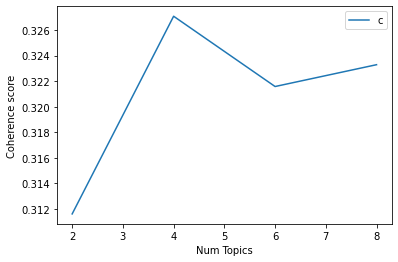

In [60]:
import matplotlib.pyplot as plt
limit=10
start=2
step=2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [61]:
# Running and Trainign LDA model on the document term matrix.
ldamodel_4 = Lda(doc_term_matrix, num_topics=4, id2word = dictionary, random_state = 100)

In [62]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(ldamodel_4, doc_term_matrix, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.007209  0.001210       1        1  33.288752
3      0.011504 -0.003698       2        1  27.648491
2     -0.012325 -0.008372       3        1  26.108893
0     -0.006388  0.010860       4        1  12.953864, topic_info=         Term         Freq        Total Category  logprob  loglift
23   internet  3248.000000  3248.000000  Default  30.0000  30.0000
46      speed  1258.000000  1258.000000  Default  29.0000  29.0000
169      tech   514.000000   514.000000  Default  28.0000  28.0000
288     cable  1117.000000  1117.000000  Default  27.0000  27.0000
56       call  3250.000000  3250.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
52    account   114.112480   983.851786   Topic4  -5.2138  -0.1105
6        bill   150.899390  1784.996425   Topic4  -4.9344  -0.4268
176      year    93.892552   722.951636   Topic4  -5.4088   0.0026
30      never    94.757905   791.802151   Topic4  -5.3997  -0.0792
286      work    94.410176   851.944083   Topic4  -5.4033  -0.1561

[378 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
6220      3  0.522303  accessing
52        1  0.311022    account
52        2  0.421812    account
52        3  0.151446    account
52        4  0.115871    account
...     ...       ...        ...
176       3  0.384535       year
176       4  0.130023       year
5457      1  0.597592         ……
5457      2  0.199197         ……
5457      3  0.199197         ……

[706 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

In [63]:
print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
for i in range(4):
    print('\nTopic {}\n'.format(str(i)))
    for term, frequency in ldamodel_4.show_topic(i, topn=10):
        print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))

term                 frequency


Topic 0

internet             0.020
call                 0.017
get                  0.012
pay                  0.012
tell                 0.011
month                0.011
time                 0.009
speed                0.009
say                  0.009
cable                0.009

Topic 1

call                 0.026
internet             0.018
get                  0.015
tell                 0.014
charge               0.013
time                 0.012
say                  0.012
month                0.012
pay                  0.011
bill                 0.011

Topic 2

internet             0.026
speed                0.012
get                  0.012
call                 0.012
month                0.011
tell                 0.011
go                   0.010
pay                  0.009
cable                0.009
charge               0.009

Topic 3

call                 0.022
bill                 0.017
internet             0.017
tell                 0.014
month     

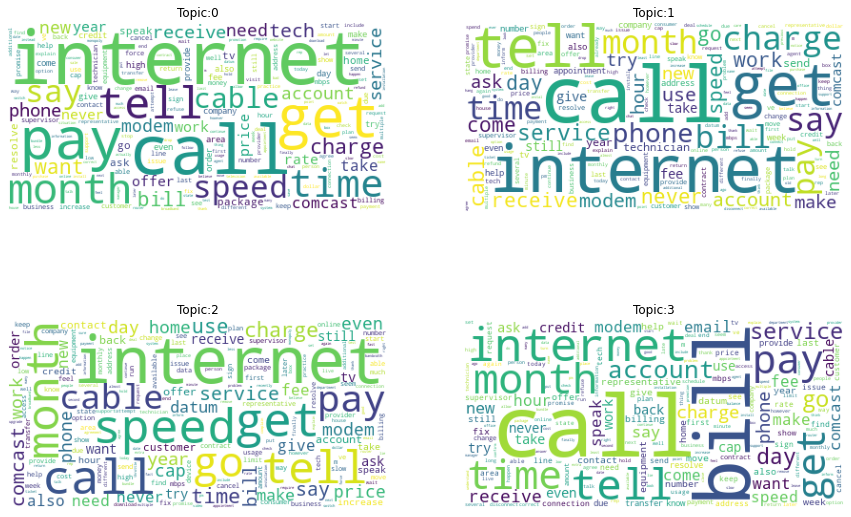

In [113]:

fig = plt.figure(figsize=(15, 10))
columns = 2
rows = 2
for i in range(1, columns*rows +1):

    ax = fig.add_subplot(rows, columns, i)
    ax.set_title("Topic:"+str(i-1)) 
    ax.axis('off')
    plt.imshow(WordCloud(background_color="white", contour_width=5, contour_color='steelblue').fit_words(dict(ldamodel_4.show_topic(i-1, 200))))
plt.show()

# Optimal Number of topics TF-IDF LDA

In [64]:
def compute_coherence_values_tfidf(dictionary, corpus_tfidf, doc_clean, limit, start=2, step=3):

    coherence_values_tfidf = []
    model_list_tfidf = []
    for num_topics in range(start, limit, step):
        model = Lda(corpus_tfidf, num_topics=num_topics, id2word = dictionary, random_state = 100)
        model_list_tfidf.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values_tfidf.append(coherencemodel.get_coherence())

    return model_list_tfidf, coherence_values_tfidf

In [65]:
model_list_tfidf, coherence_values_tfidf = compute_coherence_values_tfidf(dictionary=dictionary, corpus_tfidf=corpus_tfidf, doc_clean=doc_clean, limit=10, start=2, step=2)

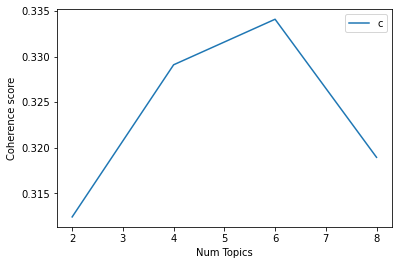

In [66]:
import matplotlib.pyplot as plt
limit=10
start=2
step=2
x = range(start, limit, step)
plt.plot(x, coherence_values_tfidf)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [67]:
# Running and Trainign LDA model on the document term matrix.
ldamodel_6_tfidf = Lda(corpus_tfidf, num_topics=6, id2word = dictionary, random_state = 100)

In [68]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(ldamodel_6_tfidf, doc_term_matrix, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.020492 -0.003029       1        1  62.516691
1      0.008442 -0.020742       2        1   9.569001
4      0.002187  0.004593       3        1   8.849092
3      0.003181 -0.008181       4        1   7.685236
2     -0.012317  0.012479       5        1   6.751957
0      0.019000  0.014880       6        1   4.628023, topic_info=        Term        Freq       Total Category  logprob  loglift
46     speed  589.000000  589.000000  Default  30.0000  30.0000
56      call  574.000000  574.000000  Default  29.0000  29.0000
6       bill  561.000000  561.000000  Default  28.0000  28.0000
28     month  473.000000  473.000000  Default  27.0000  27.0000
179   charge  509.000000  509.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
42       say   14.417884  414.810750   Topic6  -6.2533  -0.2863
49      time   14.675456  438.218294   Topic6  -6.2355  -0.3235
52   account   13.292568  348.392402   Topic6  -6.3345  -0.1931
191      new   12.673794  290.255490   Topic6  -6.3822  -0.0582
145    phone   12.796425  358.508042   Topic6  -6.3726  -0.2597

[499 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
52        1  0.602769  account
52        2  0.086110  account
52        3  0.109072  account
52        4  0.103332  account
52        5  0.060277  account
...     ...       ...      ...
3232      2  0.032139      ’ve
3232      3  0.064278      ’ve
3232      4  0.032139      ’ve
3232      5  0.032139      ’ve
3232      6  0.032139      ’ve

[1859 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 5, 4, 3, 1])

In [69]:
print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
for i in range(6):
    print('\nTopic {}\n'.format(str(i)))
    for term, frequency in ldamodel_6_tfidf.show_topic(i, topn=10):
        print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))

term                 frequency


Topic 0

call                 0.003
speed                0.003
cable                0.003
pay                  0.003
month                0.002
tech                 0.002
get                  0.002
bill                 0.002
price                0.002
tell                 0.002

Topic 1

call                 0.004
charge               0.004
tell                 0.003
get                  0.003
modem                0.003
say                  0.003
speed                0.003
time                 0.003
month                0.003
work                 0.003

Topic 2

speed                0.005
cap                  0.003
internet             0.003
modem                0.003
get                  0.003
call                 0.003
charge               0.003
go                   0.003
tell                 0.003
pay                  0.003

Topic 3

call                 0.003
bill                 0.003
speed                0.003
datum                0.003
cap       

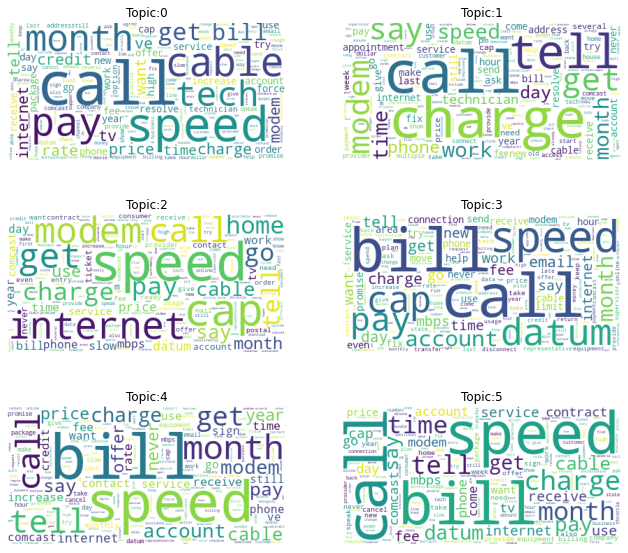

In [86]:

fig = plt.figure(figsize=(11, 10))
columns = 2
rows = 3
for i in range(1, columns*rows +1):

    ax = fig.add_subplot(rows, columns, i)
    ax.set_title("Topic:"+str(i-1)) 
    ax.axis('off')
    plt.imshow(WordCloud(background_color="white", contour_width=3, contour_color='steelblue').fit_words(dict(ldamodel_6_tfidf.show_topic(i-1, 200))))
plt.show()

In [ ]:
# Insights
Topic_0= 'cable issue'
Topic_1= 'Modem issue'
Topic_2= 'Internet Speed'
Topic_3= 'Data Caps'
Topic_4= 'Billing'
Topic_5= 'Call charges'

In [94]:
unseen_document = 'My Internet is not working'

d_c = clean(unseen_document)
print(d_c)
bow_vector = dictionary.doc2bow(d_c)

corpus_tfidf_6 = tfidf[bow_vector]
for index, score in sorted(ldamodel_6_tfidf[corpus_tfidf_6], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, ldamodel_6_tfidf.print_topic(index, 5)))

['internet', 'working']
Score: 0.5972960591316223	 Topic: 0.005*"speed" + 0.003*"cap" + 0.003*"internet" + 0.003*"modem" + 0.003*"get"
Score: 0.08098658919334412	 Topic: 0.004*"call" + 0.004*"charge" + 0.003*"tell" + 0.003*"get" + 0.003*"modem"
Score: 0.08091441541910172	 Topic: 0.004*"bill" + 0.004*"speed" + 0.004*"call" + 0.003*"charge" + 0.003*"month"
Score: 0.08039429783821106	 Topic: 0.004*"bill" + 0.003*"speed" + 0.003*"month" + 0.003*"tell" + 0.003*"call"
Score: 0.08039247989654541	 Topic: 0.003*"call" + 0.003*"bill" + 0.003*"speed" + 0.003*"datum" + 0.003*"cap"
Score: 0.08001618832349777	 Topic: 0.003*"call" + 0.003*"speed" + 0.003*"cable" + 0.003*"pay" + 0.002*"month"


In [95]:
unseen_document = 'I have problem with my internet connection, but I have paid this month fee'
d_c = clean(unseen_document)
print(d_c)
bow_vector = dictionary.doc2bow(d_c)

corpus_tfidf_6 = tfidf[bow_vector]
for index, score in sorted(ldamodel_6_tfidf[corpus_tfidf_6], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, ldamodel_6_tfidf.print_topic(index, 5)))

['internet', 'connection', 'pay', 'month', 'fee']
Score: 0.7133060097694397	 Topic: 0.004*"bill" + 0.004*"speed" + 0.004*"call" + 0.003*"charge" + 0.003*"month"
Score: 0.057533539831638336	 Topic: 0.003*"call" + 0.003*"bill" + 0.003*"speed" + 0.003*"datum" + 0.003*"cap"
Score: 0.057310573756694794	 Topic: 0.005*"speed" + 0.003*"cap" + 0.003*"internet" + 0.003*"modem" + 0.003*"get"
Score: 0.05730791017413139	 Topic: 0.004*"bill" + 0.003*"speed" + 0.003*"month" + 0.003*"tell" + 0.003*"call"
Score: 0.05730734020471573	 Topic: 0.004*"call" + 0.004*"charge" + 0.003*"tell" + 0.003*"get" + 0.003*"modem"
Score: 0.057234667241573334	 Topic: 0.003*"call" + 0.003*"speed" + 0.003*"cable" + 0.003*"pay" + 0.002*"month"


In [117]:
unseen_document = 'My model is not working properly'
d_c = clean(unseen_document)
print(d_c)
bow_vector = dictionary.doc2bow(d_c)

corpus_tfidf_6 = tfidf[bow_vector]
for index, score in sorted(ldamodel_6_tfidf[corpus_tfidf_6], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, ldamodel_6_tfidf.print_topic(index, 5)))

['model', 'work', 'properly']
Score: 0.6759145259857178	 Topic: 0.004*"call" + 0.004*"charge" + 0.003*"tell" + 0.003*"get" + 0.003*"modem"
Score: 0.06497937440872192	 Topic: 0.004*"bill" + 0.003*"speed" + 0.003*"month" + 0.003*"tell" + 0.003*"call"
Score: 0.06487445533275604	 Topic: 0.003*"call" + 0.003*"bill" + 0.003*"speed" + 0.003*"datum" + 0.003*"cap"
Score: 0.0648036077618599	 Topic: 0.005*"speed" + 0.003*"cap" + 0.003*"internet" + 0.003*"modem" + 0.003*"get"
Score: 0.06476867944002151	 Topic: 0.004*"bill" + 0.004*"speed" + 0.004*"call" + 0.003*"charge" + 0.003*"month"
Score: 0.06465937197208405	 Topic: 0.003*"call" + 0.003*"speed" + 0.003*"cable" + 0.003*"pay" + 0.002*"month"


# PLSA

In [72]:
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA

In [73]:
pipeline = Pipeline(*DEFAULT_PIPELINE)
pipeline

Pipeline:
0: remove_non_ascii
1: to_lower
2: remove_numbers
3: tag_remover
4: punctuation_remover
5: tokenize
6: LemmatizeWords
7: RemoveStopwords
8: short_word_remover

In [74]:
csv_file = 'D:\Coventry\Modeling\comcast_docs.csv'

<>:1: DeprecationWarning: invalid escape sequence \C
<>:1: DeprecationWarning: invalid escape sequence \C
C:\Users\Johnson\AppData\Local\Temp/ipykernel_6688/2823549439.py:1: DeprecationWarning: invalid escape sequence \C
  csv_file = 'D:\Coventry\Modeling\comcast_docs.csv'


In [75]:
corpus = Corpus.from_csv(csv_file, pipeline, max_docs = 2225)
corpus

Corpus:
Number of documents: 2225
Number of words:     4699

In [76]:
n_topics = 6

In [77]:
plsa = PLSA(corpus, n_topics, True)
plsa

PLSA:
====
Number of topics:     6
Number of documents:  2225
Number of words:      4699
Number of iterations: 0

In [78]:
result = plsa.fit()
plsa

PLSA:
====
Number of topics:     6
Number of documents:  2225
Number of words:      4699
Number of iterations: 172

In [50]:
result = plsa.best_of(5)

In [51]:
result.topic

array([0.24610753, 0.17461412, 0.17024115, 0.16033353, 0.14636208,
       0.1023416 ])

In [79]:
visualize = Visualize(result)
visualize

Visualize:
Number of topics:    6
Number of documents: 2225
Number of words:     4699

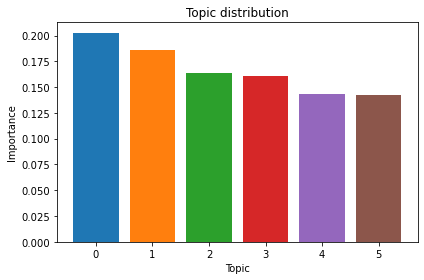

In [80]:
fig, ax = plt.subplots()
_ = visualize.topics(ax)
fig.tight_layout()

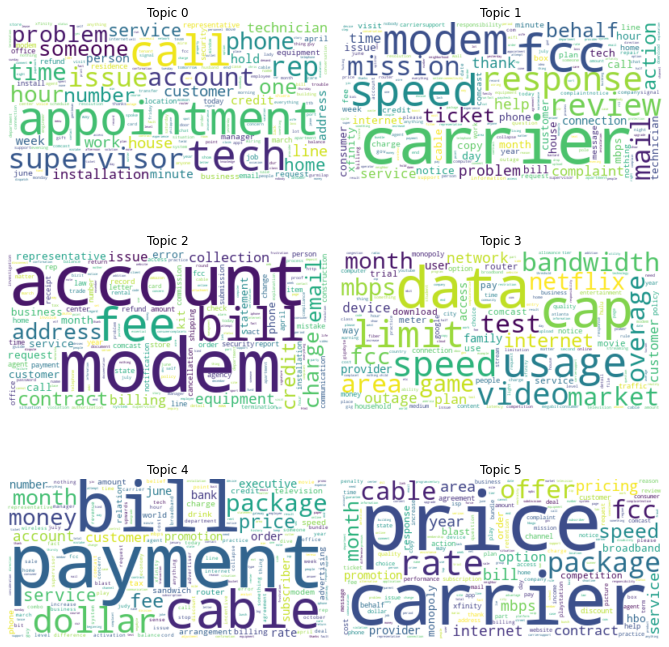

In [81]:
fig = plt.figure(figsize=(9.4, 10))
_ = visualize.wordclouds(fig)

In [ ]:
# Insights
Topic_0= 'Missed call (appointments)'
Topic_1= 'Internet Speed'
Topic_2= 'User account issue'
Topic_3= 'Data Caps'
Topic_4= 'Billing'
Topic_5= 'Pricing'

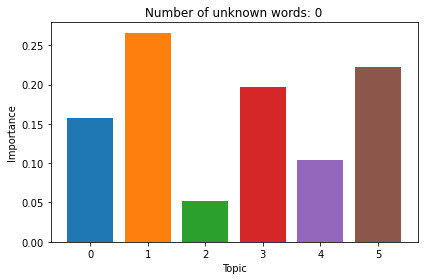

In [97]:
new_doc = 'My Internet is not working'

fig, ax = plt.subplots()
_ = visualize.prediction(new_doc, ax)
fig.tight_layout()

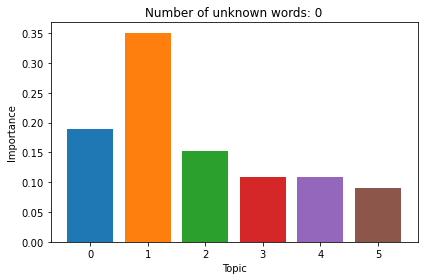

In [96]:
new_doc = 'I have problem with my internet connection, but I have paid this month fee'

fig, ax = plt.subplots()
_ = visualize.prediction(new_doc, ax)
fig.tight_layout()